### 1. Importer les bibliothèques nécessaires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Charger et explorer le dataset

In [70]:
# a. Charger le dataset 'adult.csv'
df = pd.read_csv('adult.csv')
# b. Afficher 10 lignes du dataset.
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [71]:
# c. Afficher les informations générales et les dimensions du tableau
df.info()
print(f"\nDimensions du tableau : {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Dimensions du tableau : (32561, 15)


### 3. Statistiques descriptives

In [72]:
# a. Statistiques pour les variables numériques
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


**Interprétation des résultats pour capital-gain et capital-loss :**
- La plupart des individus n'ont ni gain ni perte en capital, d'où une médiane et une majorité de valeurs à 0.
- Les valeurs maximales très élevées (ex : 99999) indiquent la présence de quelques cas exceptionnels ou valeurs aberrantes.
- Cela peut être dû à la nature du recensement : peu de personnes déclarent des opérations financières importantes, et les valeurs extrêmes peuvent fausser la moyenne.
- Il faudra vérifier si ces valeurs extrêmes sont plausibles ou s'il s'agit d'erreurs ou d'une codification particulière (par exemple, 99999 pour indiquer une absence de donnée réelle).

**Interprétation pour hours.per.week :**
- Si le 25% (Q1) et le 50% (médiane) sont tous les deux à 40h, cela signifie :
    - 25% des personnes travaillent 40h ou moins.
    - Entre 25% et 50% des personnes, la valeur reste à 40h : il y a donc une forte concentration de personnes travaillant exactement 40h.
- Cela reflète donc une norme du temps plein et une faible dispersion des heures travaillées dans cette tranche de la population.

In [73]:
# b. Statistiques pour les variables catégorielles
df.describe(include=['object']).T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


**Interprétation détaillée des résultats pour les variables catégorielles :**
- Certaines catégories sont très dominantes, par exemple :
    - `workclass` : la majorité des individus appartiennent à une classe principales `Private`.
    - `education` : 'HS-grad' très fréquents, ce qui reflète le niveau d’éducation moyen de la population.
    - `marital-status` : la répartition montre la structure familiale, avec une forte proportion de personnes mariées.
    - `relationship` : beaucoup de personnes sont chefs de famille.
    - `native-country` : la plupart des individus sont nés dans les états unis, les autres pays sont minoritaires.
    - `income` : la variable cible montre la proportion de personnes gagnant plus ou moins de 50K ; souvent, la majorité gagne >=50K.

### 4. Prétraitement des données

In [34]:
# a. Valeurs manquantes
# Afficher le nombre de ‘ ?’ par colonne avant traitement
print('Nombre de "?" par colonne avant traitement :')
print((df == '?').sum())

# Remplacer les ‘ ?’ par NaN
df.replace('?', np.nan, inplace=True)

# Afficher le nombre de valeurs manquantes (NaN) par colonne après remplacement
print('\nNombre de valeurs manquantes (NaN) par colonne après remplacement :')
print(df.isnull().sum())

# Identifier les colonnes contenant des valeurs manquantes
missing_cols = df.columns[df.isnull().any()]
print('\nColonnes avec valeurs manquantes :', list(missing_cols))

# Imputer les valeurs manquantes par le mode de chaque colonne concernée
for col in missing_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

# Afficher le nombre de valeurs manquantes (NaN) par colonne après imputation
print('\nNombre de valeurs manquantes (NaN) par colonne après imputation :')
print(df.isnull().sum())

Nombre de "?" par colonne avant traitement :
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Nombre de valeurs manquantes (NaN) par colonne après remplacement :
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Colonnes avec valeurs manquantes : ['workclass', 'occupation', 'native.country']

Nombre de valeurs manquantes (NaN) par colonne après imputation :
age               0
w

C:\Users\bouma12\AppData\Local\Temp\ipykernel_39708\3019826028.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode, inplace=True)


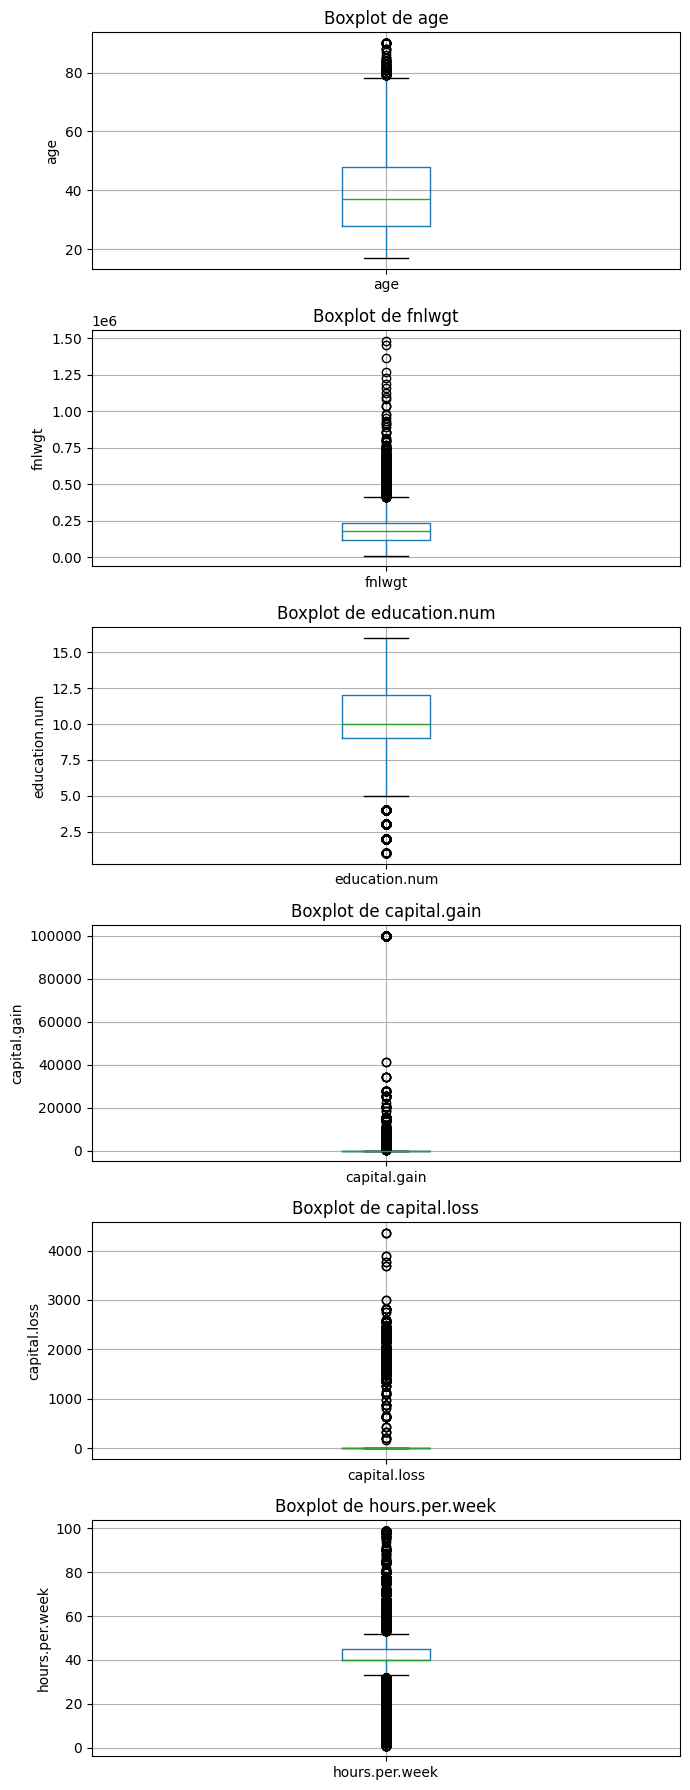

In [74]:
# b. Valeurs aberrantes : boxplots pour les variables numériques
# Boxplots individuels pour chaque variable numérique
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(7, 3 * len(num_cols)))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    df.boxplot(column=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Interprétation des boxplots côte à côte :**
- Cette visualisation permet de comparer la dispersion et la présence de valeurs aberrantes pour chaque variable numérique.
- `capital-gain` et `capital-loss` : la majorité des valeurs sont à 0, mais quelques valeurs extrêmes très élevées apparaissent, ce qui indique des cas rares ou des outliers.
- `hours-per-week` : la distribution est très concentrée autour de 40h, confirmant la norme du temps plein, mais on observe quelques cas atypiques (moins ou plus d'heures).
- `age` : la plupart des individus sont des adultes, mais il existe quelques valeurs plus jeunes ou plus âgées.

**Décision sur les valeurs aberrantes :**
- Pour ce type de données (recensement), il est souvent préférable de garder les valeurs aberrantes si elles sont plausibles, car elles peuvent représenter des cas réels (ex : personnes avec des gains exceptionnels).
- Pour l’analyse exploratoire, il est recommandé de garder les outliers, puis de décider au cas par cas lors de la modélisation (suppression ou correction si nécessaire).
- Si une valeur aberrante est une erreur ou une codification spéciale (ex : 99999 pour capital-gain), il faut la corriger ou l’exclure.

In [43]:
# c. Encodage des variables catégorielles
cat_cols = df.select_dtypes(include=['object']).columns
# On applique un encodage One-Hot pour toutes les variables catégorielles sauf la cible 'income'
df_encoded = pd.get_dummies(df, columns=[col for col in cat_cols if col != 'income'], drop_first=True)
# On garde la variable cible 'income' telle quelle pour l'analyse
print('Dimensions du tableau après encodage :', df_encoded.shape)
df_encoded.head()

Dimensions du tableau après encodage : (32561, 98)


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,4356,18,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,4356,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


**Interprétation de l’encodage des variables catégorielles :**
- L’encodage One-Hot transforme chaque modalité des variables catégorielles en une colonne binaire (0 ou 1).
- Cela permet d’utiliser ces variables dans des modèles statistiques ou d’apprentissage automatique qui nécessitent des données numériques.
- Le paramètre `drop_first=True` évite la redondance en supprimant la première modalité de chaque variable (réduit la colinéarité).
- La variable cible `income` reste inchangée pour faciliter l’analyse et la prédiction.
- Après encodage, le nombre de colonnes augmente : chaque modalité devient une nouvelle variable explicative.

### 5. Analyse et regroupement

In [48]:
# a. Groupe par sexe : moyenne de l’âge et des heures travaillées par semaine
print(df.groupby('sex')[['age', 'hours.per.week']].mean())
print("----------------------------------")

              age  hours.per.week
sex                              
Female  36.858230       36.410361
Male    39.433547       42.428086
----------------------------------


In [49]:
# b. Proportion de personnes gagnant >50K ou ≤50K par niveau d’éducation (code le plus simple)
print(df.groupby('education')['income'].value_counts(normalize=True))

education     income
10th          <=50K     0.933548
              >50K      0.066452
11th          <=50K     0.948936
              >50K      0.051064
12th          <=50K     0.923788
              >50K      0.076212
1st-4th       <=50K     0.964286
              >50K      0.035714
5th-6th       <=50K     0.951952
              >50K      0.048048
7th-8th       <=50K     0.938080
              >50K      0.061920
9th           <=50K     0.947471
              >50K      0.052529
Assoc-acdm    <=50K     0.751640
              >50K      0.248360
Assoc-voc     <=50K     0.738784
              >50K      0.261216
Bachelors     <=50K     0.585247
              >50K      0.414753
Doctorate     >50K      0.740920
              <=50K     0.259080
HS-grad       <=50K     0.840491
              >50K      0.159509
Masters       >50K      0.556587
              <=50K     0.443413
Preschool     <=50K     1.000000
Prof-school   >50K      0.734375
              <=50K     0.265625
Some-college  <=50K   

### 6.Visualisations avec Matplotlib

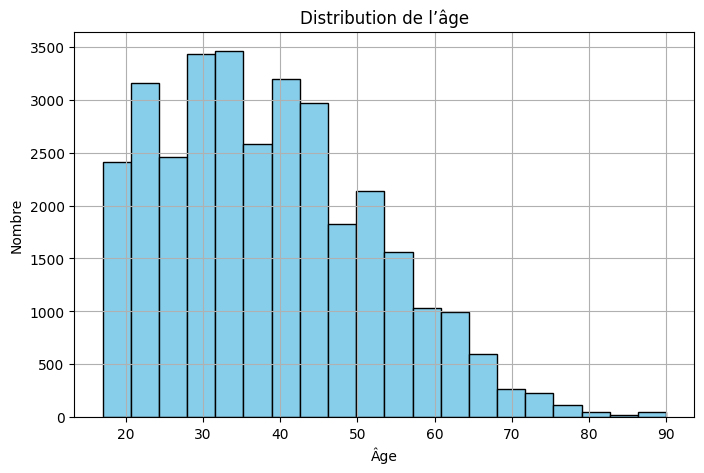

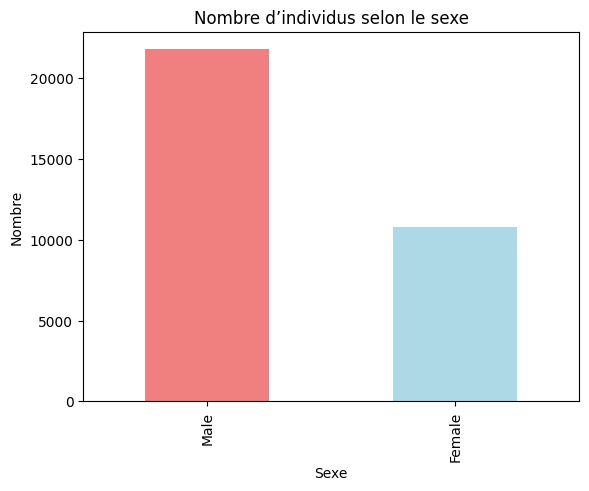

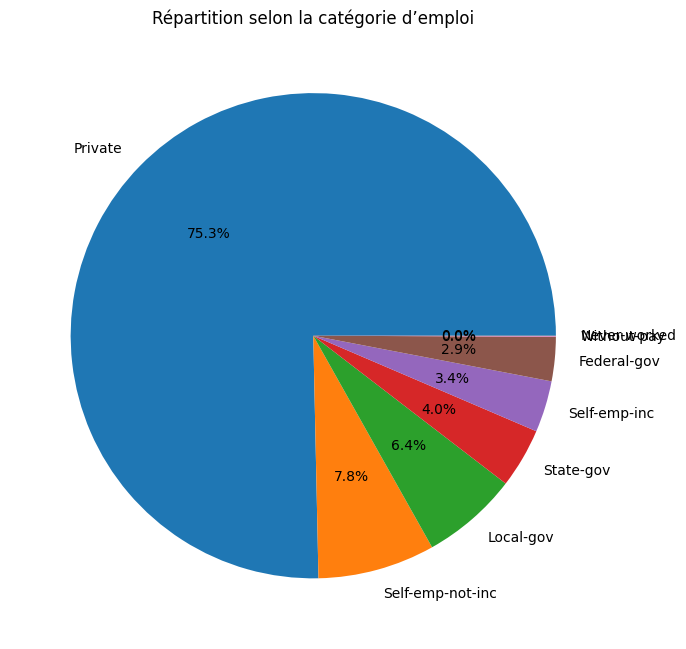

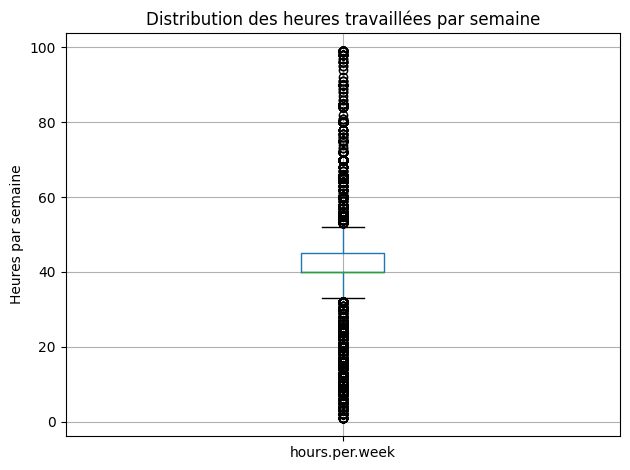

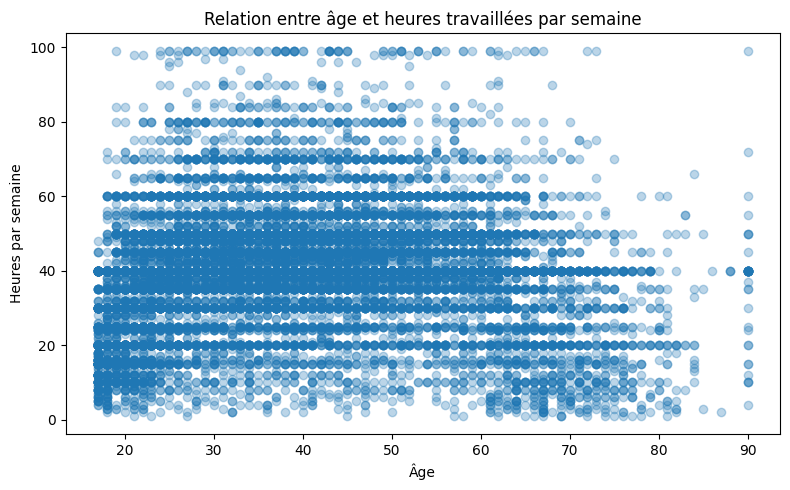

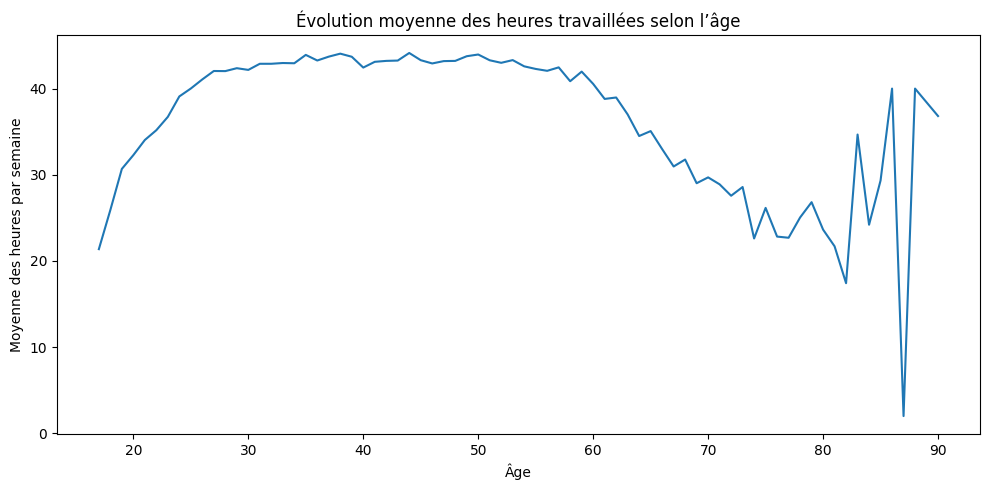

In [57]:
# Histogramme : distribution de l’âge
plt.figure(figsize=(8,5))
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution de l’âge')
plt.xlabel('Âge')
plt.ylabel('Nombre')
plt.show()

# Diagramme à barres : nombre d’individus selon le sexe
df['sex'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Nombre d’individus selon le sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre')
plt.show()

# Diagramme circulaire : répartition selon la catégorie d’emploi
df['workclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,8))
plt.title('Répartition selon la catégorie d’emploi')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Boxplot : distribution des heures travaillées par semaine
df.boxplot(column='hours.per.week')
plt.title('Distribution des heures travaillées par semaine')
plt.ylabel('Heures par semaine')
plt.tight_layout()
plt.show()

# Scatter plot : relation entre âge et heures travaillées
plt.figure(figsize=(8,5))
plt.scatter(df['age'], df['hours.per.week'], alpha=0.3)
plt.title('Relation entre âge et heures travaillées par semaine')
plt.xlabel('Âge')
plt.ylabel('Heures par semaine')
plt.tight_layout()
plt.show()

# Graphique en ligne : évolution moyenne des heures travaillées selon l’âge
moyenne_par_age = df.groupby('age')['hours.per.week'].mean()
moyenne_par_age.plot(kind='line', figsize=(10,5))
plt.title('Évolution moyenne des heures travaillées selon l’âge')
plt.xlabel('Âge')
plt.ylabel('Moyenne des heures par semaine')
plt.tight_layout()
plt.show()

### 7. Interprétation des graphiques
- Histogramme (âge) : La majorité des individus ont entre 20 et 50 ans, la distribution est asymétrique avec peu de personnes très jeunes ou très âgées.
- Barres (sexe) : La répartition hommes/femmes est déséquilibrée, avec une majorité des hommes.
- Circulaire (workclass) : la catégorie d’emploi Private est dominante les autres sont minoritaires.
- Boxplot (heures/semaine) : La plupart travaillent autour de 40h/semaine.
- Scatter plot (âge vs heures/semaine) : Il n’y a pas de forte corrélation ; la dispersion montre que l’âge n’influence pas fortement le nombre d’heures travaillées.
- Ligne (moyenne heures/semaine par âge) : La moyenne des heures travaillées reste stable selon l’âge, avec une légère baisse chez les plus jeunes et les plus âgés.

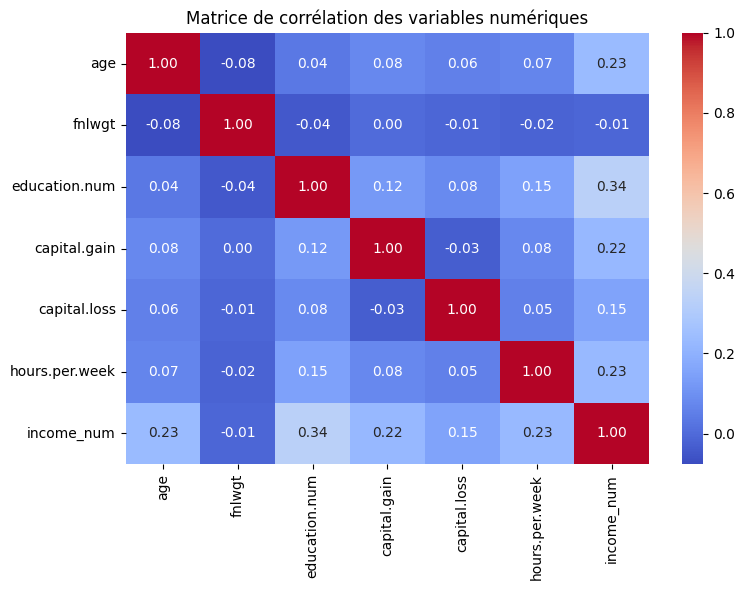

In [69]:
# Matrice de corrélation pour les variables numériques
# Pour explorer les relations avec le revenu, il faut encoder la variable cible
df_corr = df.copy()
df_corr['income_num'] = df_corr['income'].map({'>50K': 1, '<=50K': 0})
  
corr_matrix = df_corr.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

**Interprétation de la matrice de corrélation :**
- Les variables numériques du dataset présentent généralement de faibles corrélations entre elles et avec le revenu.
- Cela signifie qu’aucune variable numérique seule n’explique fortement le revenu : le phénomène est multifactoriel.
- Les variables catégorielles (éducation, secteur d’emploi, etc.) sont souvent plus informatives pour la prédiction du revenu, mais elles ne sont pas prises en compte dans la matrice de corrélation classique.

### Exploration des variables catégorielles

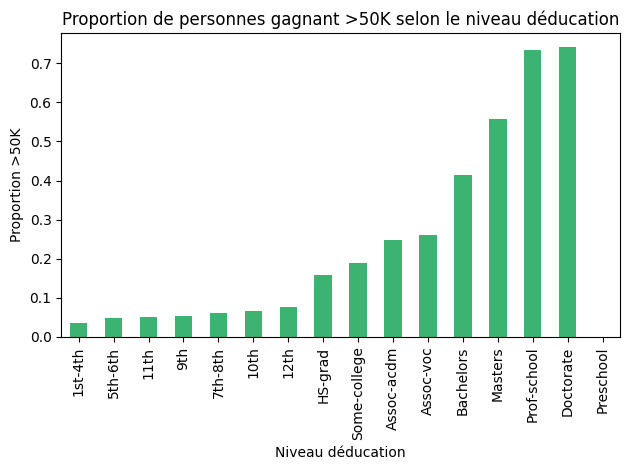

In [59]:
# Diagramme en barres - proportion de >50K par niveau d'éducation
edu_income = df.groupby('education')['income'].value_counts(normalize=True).unstack().sort_values('>50K')
edu_income['>50K'].plot(kind='bar', color='mediumseagreen')
plt.title('Proportion de personnes gagnant >50K selon le niveau d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Proportion >50K')
plt.tight_layout()
plt.show()

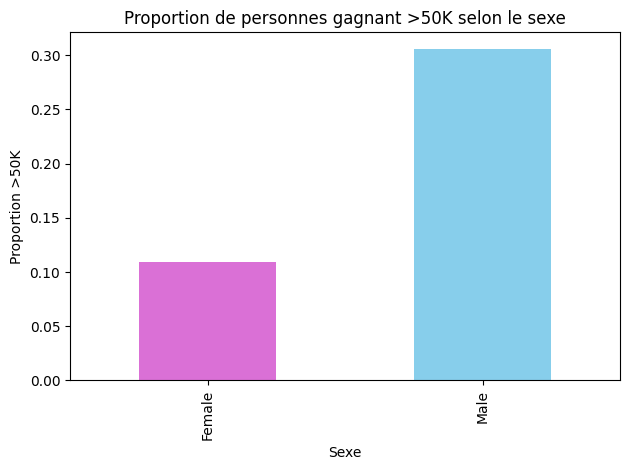

In [ ]:
# Diagramme en barres - proportion de >50K par sexe
sex_income = df.groupby('sex')['income'].value_counts(normalize=True).unstack()
sex_income['>50K'].plot(kind='bar', color=['orchid', 'skyblue'])
plt.title('Proportion de personnes gagnant >50K selon le sexe')
plt.xlabel('Sexe')
plt.ylabel('Proportion >50K')
plt.tight_layout()
plt.show()

**Relations observées dans le dataset :**
- Un niveau d’éducation plus élevé est associé à une plus grande proportion de personnes gagnant >50K.
- Les hommes ont tendance à travailler plus d’heures par semaine et à avoir un revenu plus élevé que les femmes.
- La majorité des individus travaillent autour de 40h/semaine, quelle que soit leur catégorie démographique.

### Conclusion
Ces graphiques confirment que l'éducation et le sexe sont des facteurs importants dans la répartition des revenus, ce que la matrice de corrélation ne pouvait pas montrer directement.